# Breast Cancer Wisconsin (Diagnostic) Data Set

## Team Pandas: Zuzana, Francesca & Emily

<img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-original.jpg" alt="Example cell" style="width: 400px;"/>

### Problem: breast cancer diagnosis
- Breast cancer is the second leading cause of cancer death in women [<a href="https://www.cancer.org/cancer/breast-cancer/about/how-common-is-breast-cancer.html">1 </a>]
- Death rates have been decreasing thanks to <b>early diagnosis</b> [<a href="https://www.cancer.org/cancer/breast-cancer/about/how-common-is-breast-cancer.html">1 </a>]
- Wisconsin breast cancer data set: used for the development of computer-aided diagnosis systems [<a href="https://arxiv.org/pdf/cs/9603103.pdf">2 </a>, <a href="https://dl.acm.org/doi/10.1016/j.eswa.2015.10.015">3 </a>]

### Our approach:
1. <b>Data exploration</b>: What information do we have and what do we want to predict? Are there any outliers or patterns? If patterns in the data are found, can I change the number of features?
2. <b>Data analysis</b>: Can I predict tumour diagnosis with a simple ML model with sufficient accuracy or do I benefit from mroe complex models? How do I compare the models? Which model is the best?

## Data exploration

In [1]:
#Setting up environment
import pandas as pd
import os
import numpy as np
from IPython.display import Math
 
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import metrics, svm,tree,preprocessing
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint
from sklearn.metrics import (auc, confusion_matrix, roc_curve, accuracy_score, precision_score)
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from sklearn.feature_selection import SelectKBest,chi2


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Uploading data
df_raw = pd.read_csv("/Suzi fun files/QB course/QB_DS_FinalProject/data/raw/data.csv", index_col=[0])
df_raw.describe(include = 'all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [3]:
#Remove last column 
df_raw_dropped = df_raw.drop(df_raw.columns[-1], axis=1)

In [4]:
#Label encoding of bening and malignant
df_object = df_raw_dropped.select_dtypes(include = ['object']).astype('category')
df_object['diagnosis_category'] = df_object['diagnosis'].cat.codes
df_object.head()
# Malignant = 1; bening = 0.

,diagnosis,diagnosis_category
id,,
842302,M,1
842517,M,1
84300903,M,1
84348301,M,1
84358402,M,1


In [5]:
df_processed=df_raw_dropped.drop(['diagnosis'],axis=1)
df_processed['diagnosis_category'] = df_object['diagnosis_category']
print(df_processed['diagnosis_category'].value_counts())

0    357
1    212
Name: diagnosis_category, dtype: int64


We have <b>357 bening</b> and <b>212 malignant</b> cases, quite a balanced data set.

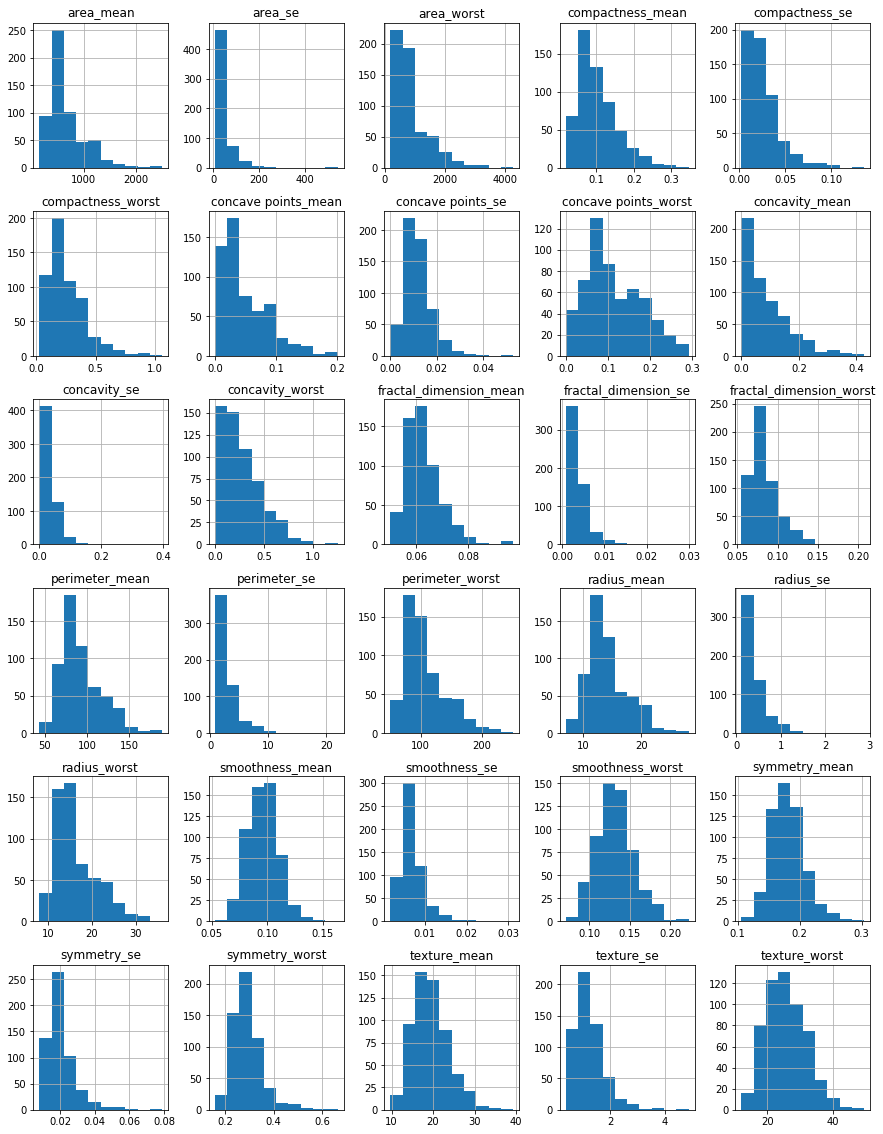

In [8]:
#Plot histograms for all columns
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_raw_dropped.hist(ax = ax);

In [6]:
# Apply SelectKBest class to extract top 15 best features
X = df_processed.iloc[:,0:31]  #independent columns
y = df_processed.iloc[:,-1]    #target column
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

                 Specs          Score
23          area_worst  112598.431564
3            area_mean   53991.655924
13             area_se    8758.504705
22     perimeter_worst    3665.035416
2       perimeter_mean    2011.102864
20        radius_worst     491.689157
30  diagnosis_category     357.000000
0          radius_mean     266.104917
12        perimeter_se     250.571896
21       texture_worst     174.449400
1         texture_mean      93.897508
26     concavity_worst      39.516915
10           radius_se      34.675247
6       concavity_mean      19.712354
25   compactness_worst      19.314922


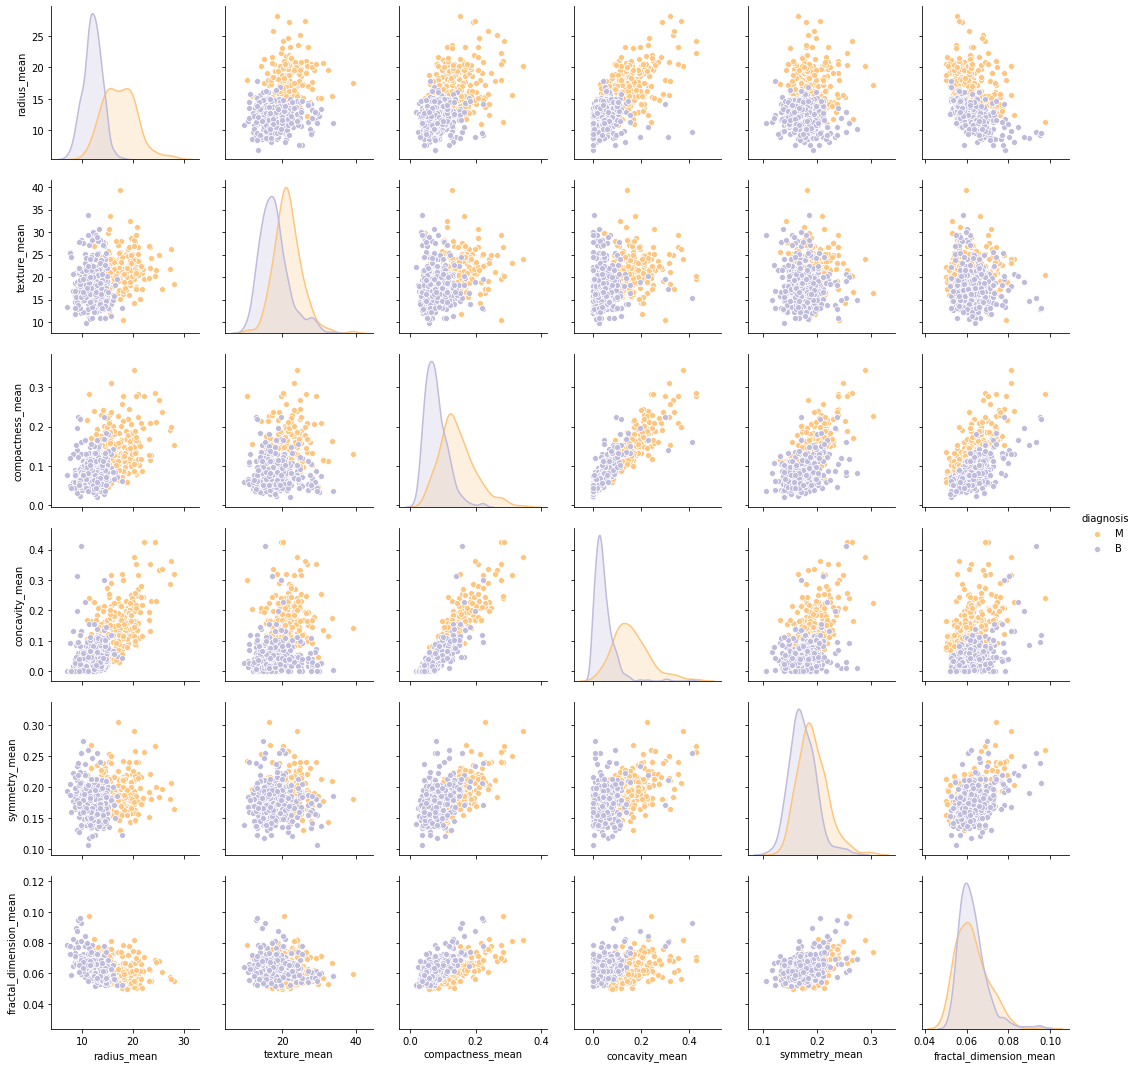

In [7]:
df_select_features = df_raw_dropped[['radius_mean','texture_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean','diagnosis']]
sns.pairplot(df_select_features, hue="diagnosis", palette="PuOr");

There is definitely a division between the two types of diagnosis visible. Let's check for outliers.

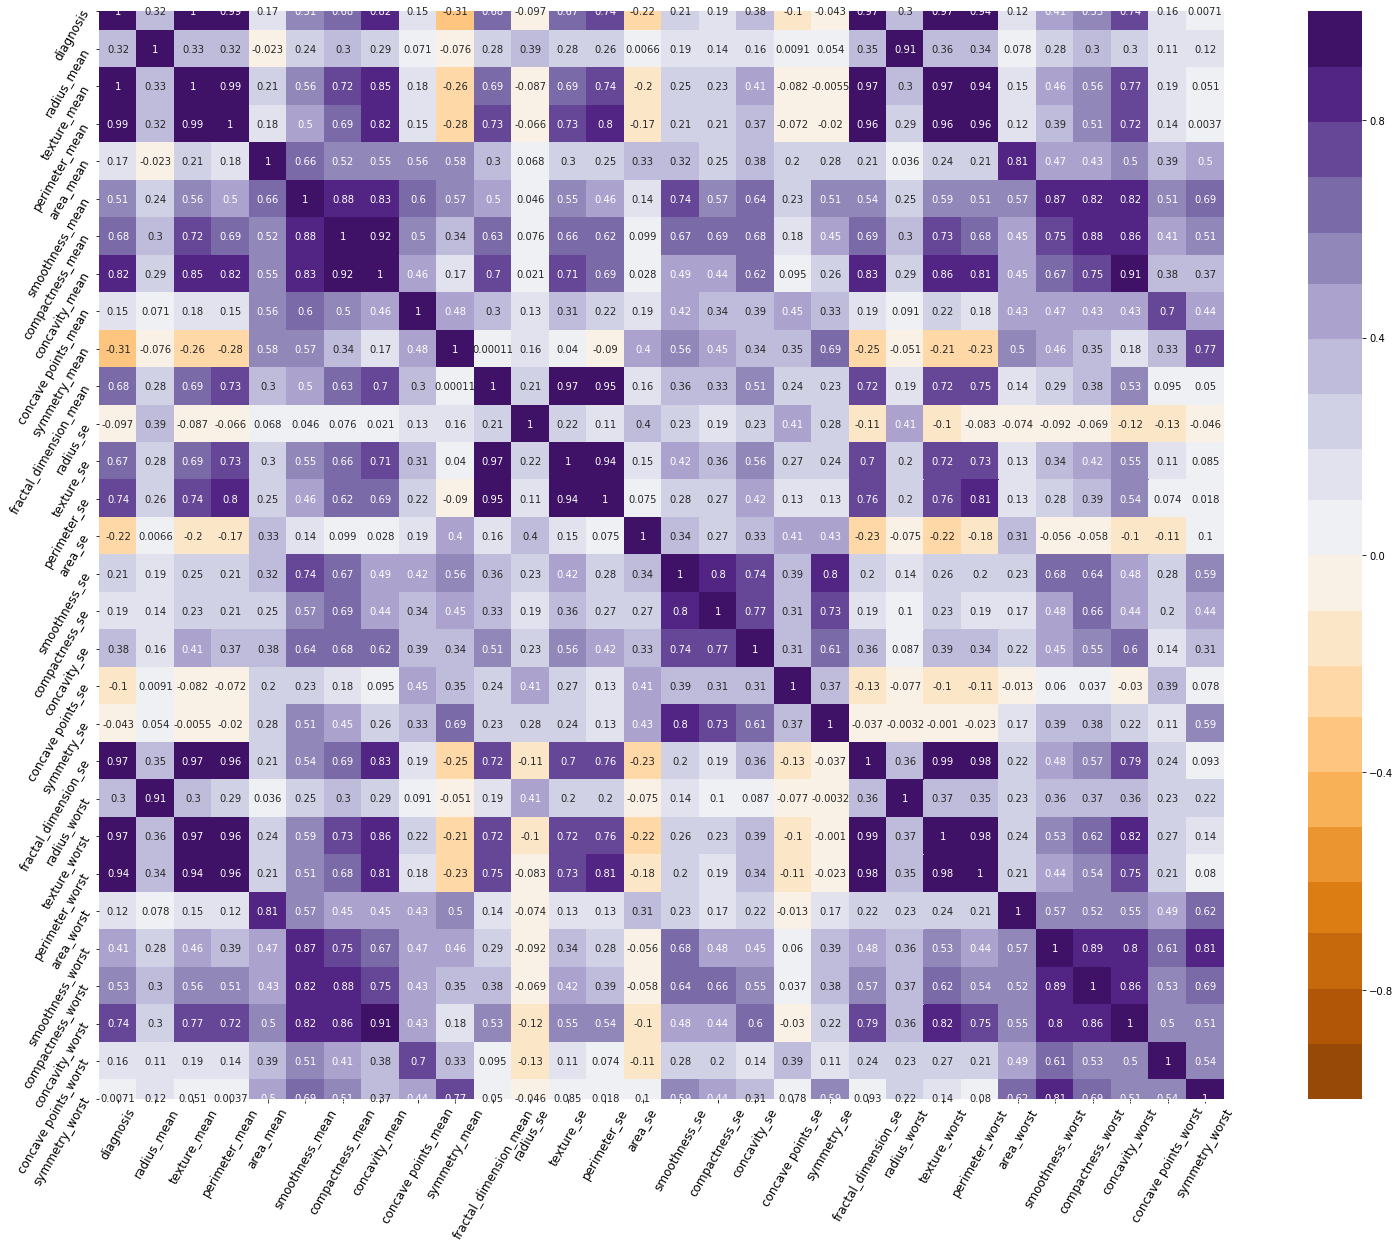

In [9]:
#Correlation plot
corr = df_raw_dropped.corr().values
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.color_palette("PuOr", 20),square=True,annot=True,)
labels=list(df_raw_dropped.columns)
ax.set_xticklabels(labels,fontsize=12,rotation=60)
ax.set_yticklabels(labels,fontsize=12,rotation=60);

As expected, strong correlation between various features is evident. We can remove correlation using the VIF. Function to remove VIF taken from <a href="https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python"> 4</a>.

In [10]:
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

df_removed_features=calculate_vif_(df_processed)

Remaining variables:
Index(['texture_se', 'area_se', 'concavity_se', 'diagnosis_category'], dtype='object')


## Data analysis

We have a <b>supervised classification</b> problem, model selection depends on the data sets: 

1. set with <b>all</b> features with multicollinearity.
2. set with <b>selected</b> features with removed multicollinearity.

### Selected features
Preliminary analysis of the small data set showed poor results: 
- Logistic regression: 92% accuracy
- Decision tree: 89% accuracy

### All features

- Using non-parametric models that can handle multicollinearity.
- How do we compare the models?

In [11]:
# Loading test and train data
X_test_df= pd.read_csv("/Suzi fun files/QB course/QB_DS_FinalProject/data/interim/X_test.csv", index_col=[0])
X_test_df.columns=df_processed.columns[:-1]
X_test = X_test_df.values

X_train_df= pd.read_csv("/Suzi fun files/QB course/QB_DS_FinalProject/data/interim/X_train.csv", index_col=[0])
X_train_df.columns=df_processed.columns[:-1]
X_train = X_train_df.values

y_train_df = pd.read_csv('/Suzi fun files/QB course/QB_DS_FinalProject/data/interim/y_train.csv', header=None, index_col=[0]);
y_train = y_train_df.iloc[:,0]
y_test_df = pd.read_csv('/Suzi fun files/QB course/QB_DS_FinalProject/data/interim/y_test.csv', header=None, index_col=[0]);
y_test = y_test_df.iloc[:,0]

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled  = preprocessing.scale(X_test)

### Support vector machine

In [12]:
# Tune support vector machine
kernels = ['linear','poly','rbf']
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
params_SVM = {"kernel": ['linear'], "C":Cs}
{"kernel" : ['poly'],"gamma": gammas, "C":Cs}
{"kernel" : ['rbf'],"gamma": gammas, "C":Cs}
classifier_SVM = svm.SVC(probability=True)
grid_SVM = GridSearchCV(classifier_SVM,params_SVM,scoring='roc_auc')
grid_SVM.fit(X_train_scaled,y_train)
prediction_SVM = grid_SVM.predict(X_test_scaled)
svm_tn, svm_fp, svm_fn, svm_tp = metrics.confusion_matrix(y_test, prediction_SVM).ravel()
recall_SVM = svm_tp/(svm_tp + svm_fn)
precision_SVM = svm_tp/(svm_tp + svm_fp)
probability_SVM = grid_SVM.predict_proba(X_test_scaled)

### Random forest

In [13]:
# Tune RF
random_state = 42
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 11)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(5, 55, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [10, 20, 30, 40]
bootstrap = [True,False]
params_RF = {'n_estimators': n_estimators,'max_features':max_features,'max_depth':max_depth,
             'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
classifier_RF = RandomForestClassifier()
grid_RF = RandomizedSearchCV(classifier_RF,params_RF,n_iter = 300,scoring='roc_auc',random_state=random_state,n_jobs = -1,cv=5,verbose=0)
grid_RF.fit(X_train,y_train);
prediction_RF =grid_RF.predict(X_test)
rf_tn, rf_fp, rf_fn, rf_tp = metrics.confusion_matrix(y_test, prediction_RF).ravel()
recall_RF = rf_tp/(rf_tp + rf_fn)
precision_RF = rf_tp/(rf_tp + rf_fp);

### AdaBoost

In [14]:
params_AB = {
 'n_estimators': [20, 50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]}
classifier_AB = AdaBoostClassifier(random_state=random_state)
grid_AB = RandomizedSearchCV(classifier_AB,params_AB,n_iter = 300,scoring='roc_auc',random_state=random_state,n_jobs = -1,cv=5,verbose=0)
grid_AB.fit(X_train,y_train);
prediction_AB = grid_AB.predict(X_test)
ab_tn, ab_fp, ab_fn, ab_tp = metrics.confusion_matrix(y_test, prediction_AB).ravel()
recall_AB = ab_tp/(ab_tp + ab_fn)
precision_AB = ab_tp/(ab_tp + ab_fp)
probability_AB = grid_AB.predict_proba(X_test)

### Gradient Boosting

In [15]:
# Tuning with same parameters as my random forest
learning_rate = [0.1, 0.2, 0.3];
params_GB = {'learning_rate': learning_rate,'n_estimators': n_estimators,'max_features':max_features,'max_depth':max_depth,
             'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
classifier_GB = GradientBoostingClassifier()
grid_GB = RandomizedSearchCV(classifier_GB,params_GB,n_iter = 300,scoring='roc_auc',random_state=random_state,n_jobs = -1,cv=5,verbose=0)
grid_GB.fit(X_train,y_train)
prediction_GB = grid_GB.predict(X_test)
gb_tn, gb_fp, gb_fn, gb_tp = metrics.confusion_matrix(y_test, prediction_GB).ravel()
recall_GB = gb_tp/(gb_tp + gb_fn)
precision_GB = gb_tp/(gb_tp + gb_fp);
probability_GB = grid_GB.predict_proba(X_test)

## Final comparison 

| Model | Accuracy | Recall | Precision | AOC | F1 |
| --- | --- | --- | --- | --- | --- |
| Decision tree | 94.7 | 93.0 | 93.0 | 0.963 | 93.0 |
| K nearest neighbours | 95.6 | 90.7 | 97.5 | 0.994 | 94.0 |
| <b>Support vector machine</b> | <b>98.2</b> | <b>95.3</b> | <b>100.0</b> | <b>0.998</b> | <b>97.6</b> |
| Ensemble KNN & SVM | 97.4 | 93.0 | 100.0| 0.997 | 96.4 |
| Random Forest | 96.5 | 93.0 | 97.6 | 0.996 | 95.2 |
| AdaBoost | 96.5 | 95.3 | 97.6 | 0.995 | 96.4 |
| Gradient boosting | 97.4 | 95.3 | 97.6 | 0.997 | 96.4 |

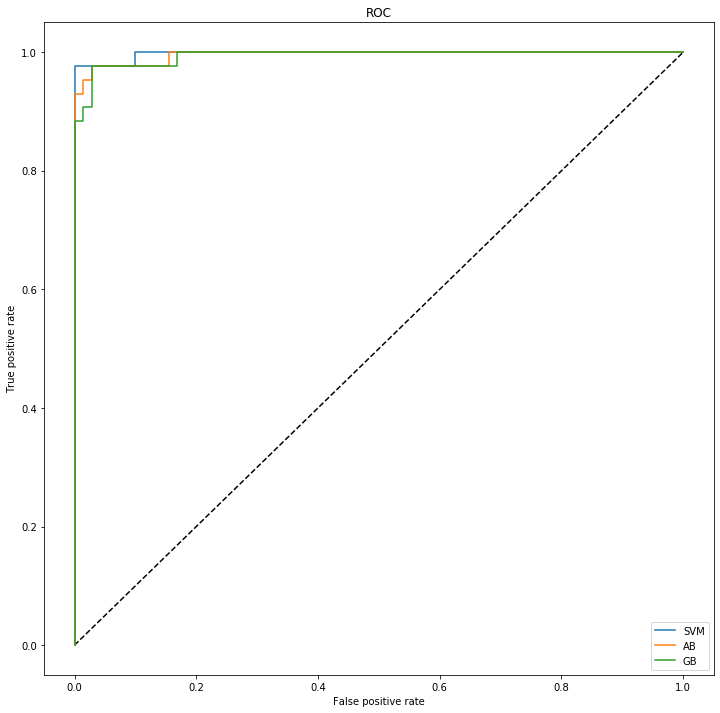

In [16]:
false_pos_rate_SVM,true_pos_rate_SVM, thresholds_SVM = roc_curve(y_test, probability_SVM[:, 1])
false_pos_rate_AB,true_pos_rate_AB, thresholds_AB = roc_curve(y_test, probability_AB[:, 1])
false_pos_rate_GB,true_pos_rate_GB, thresholds_GB = roc_curve(y_test, probability_GB[:, 1])

# Plot the ROC curve
fig = plt.figure(figsize=(12,12))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_pos_rate_SVM, true_pos_rate_SVM, label='SVM')
plt.plot(false_pos_rate_AB, true_pos_rate_AB, label='AB')
plt.plot(false_pos_rate_GB, true_pos_rate_GB, label='GB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='best')
plt.show()

### Support vector machine feature importance
function taken from <a href="https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn"> 5</a>

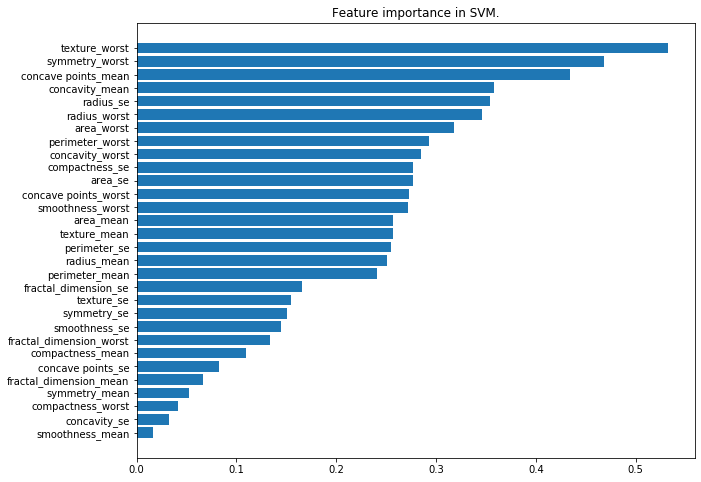

In [17]:
def f_importances(coef,estimator, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)
    plt.figure(figsize=(10,8))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title("Feature importance in {}.".format(estimator))
    plt.gca().invert_yaxis()
    plt.show()

features_names = list(df_processed.columns)    
model_SVM = grid_SVM.best_estimator_
f_importances(abs(model_SVM.coef_[0]),"SVM", features_names, top=-1)

## Conclusion

- SVM: highest F1 score and accuracy
- Used models that are understandable; SVM tumour prediction based on texture, shape and size.

### Limitations:

- Relatively small sample size, would get better idea about performance by implementing cross-validation or obtaining more data.
- Did not evaluate computational burden of models, could have removed more features.